In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import interp1d

In [2]:
r = 0.10

In [3]:
period = 12
amount = 120.

In [4]:
amount * (1+r) / period

11.0

In [5]:
def interest_compound(r_compound, r_nominal):
    interest = 0.
    total = 120.
    
    for _ in range(12):
        interest_temp = total * r_compound / 12
        interest += interest_temp
        total = total - 10. + interest_temp
        
    return interest - 120. * r_nominal

In [6]:
fsolve(lambda x: interest_compound(x, 0.10), 0.2)

array([0.16671511])

In [7]:
x = np.linspace(0., 0.25, 30)
y = np.array([fsolve(lambda x: interest_compound(x, r), 0.2) for r in x]).reshape(-1)

inv_func = interp1d(y, x)
print(inv_func(0.25))

0.15781770457687727


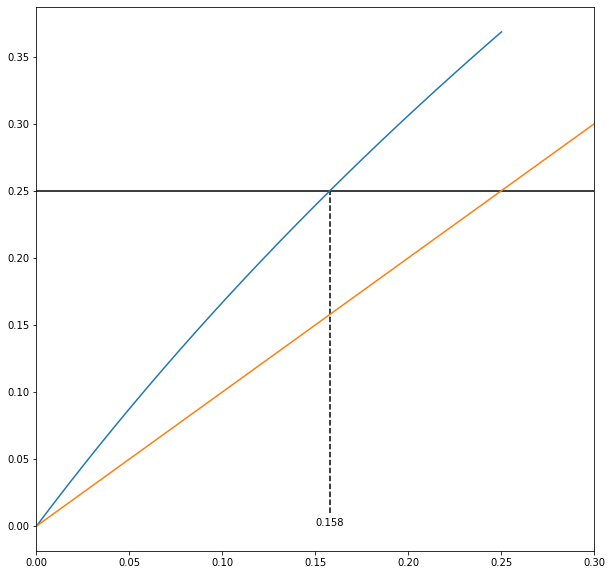

In [8]:
plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.xlim(0., 0.3)
plt.plot([0, 0.3], [0, 0.3])
plt.hlines(0.25, 0., 0.3)
plt.text(0.15, 0., '{:.3f}'.format(inv_func(0.25)))
plt.vlines(inv_func(0.25), 0.01, 0.25, linestyles='dashed');

In [9]:
def interest_time(r_compound, r_nominal, t):
    total = 120.
    monthly = total / t
    interest = 0.
    for i in reversed(range(t)):
        interest_temp = total * r_compound / t
        interest += interest_temp
        total = total - monthly + interest_temp
        
    return interest - 120. * r_nominal

In [10]:
x = np.linspace(0., 0.25, 30)
y = np.array([[fsolve(lambda x: interest_time(x, r, t), 0.2) for r in x] for t in [6, 12, 24]]).reshape(3,-1)

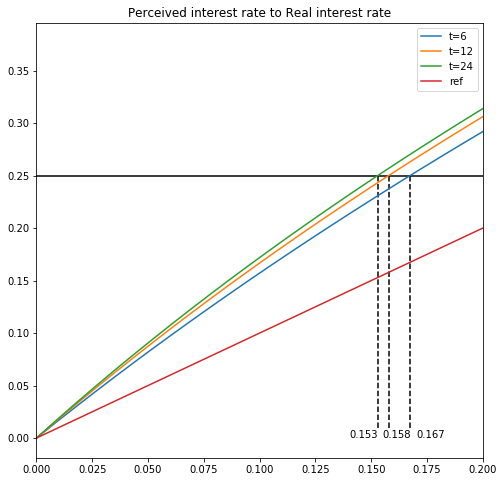

In [11]:
plt.figure(figsize=(8,8))
plt.title('Perceived interest rate to Real interest rate')
for i, t in enumerate([6, 12, 24]):
    r_per = interp1d(y[i], x)(0.25)
    plt.plot(x, y[i], label='t='+str(t))
    plt.vlines(r_per, 0.01, 0.25, linestyles='dashed')
    plt.text(0.17-i*0.015, 0, '{:.3f}'.format(r_per))
plt.xlim(0., 0.2)
plt.plot([0, 0.3], [0, 0.3], label='ref')
plt.hlines(0.25, 0., 0.2)
plt.legend();

In [12]:
def interest_time(r_compound, r_nominal, times, years):
    total = 1.
    every = total / times
    interest = 0.
    for _ in range(times):
        interest_temp = total * r_compound * years / times
        interest += interest_temp
        total = total - every + interest_temp
    return interest - 1. * r_nominal * years

In [36]:
x = np.linspace(0., 0.25, 30)
y = np.array([[fsolve(lambda x: interest_time(x, r, t, year), 0.2) for r in x] for t in [6, 12, 24] for year in [1, 2]]).reshape(6,-1)
alipay_highest=interp1d(x, y[4])(0.088)
alipay_lowest=interp1d(x, y[1])(0.088)

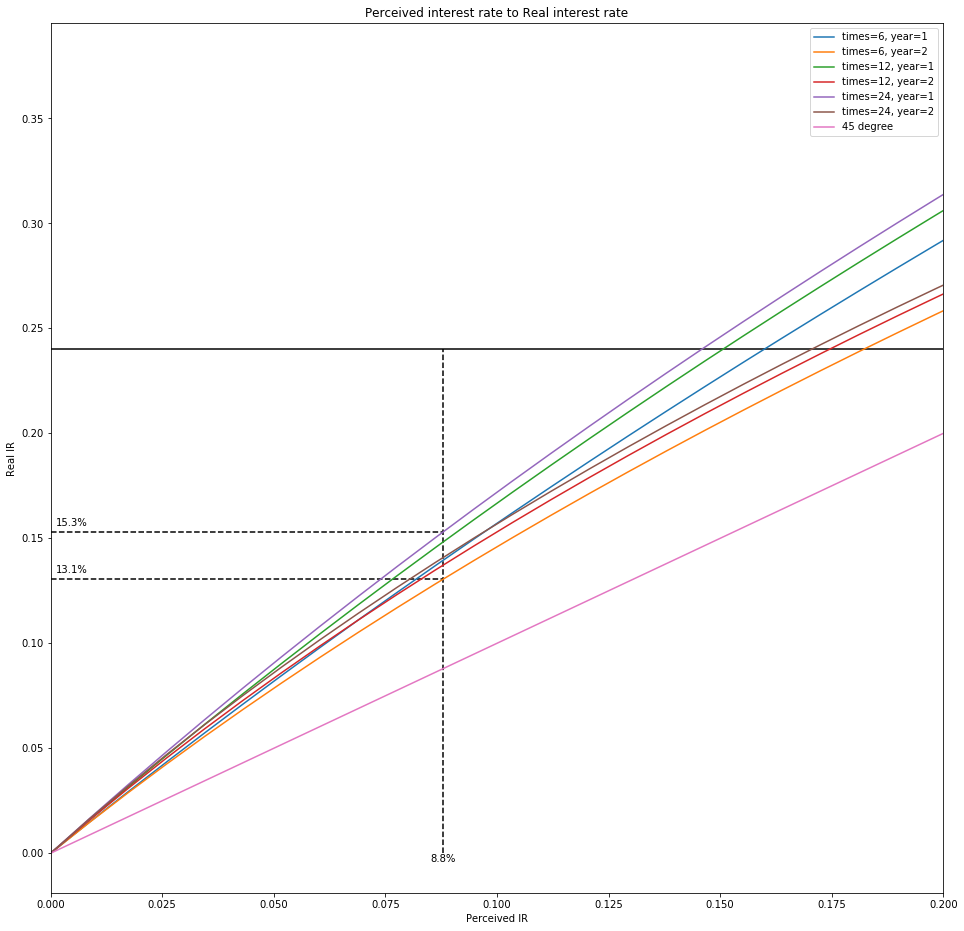

In [45]:
plt.figure(figsize=(16,16))
plt.title('Perceived interest rate to Real interest rate')
i=0
for t, year in product([6, 12, 24], [1, 2]):
    plt.plot(x, y[i], label='times='+str(t)+', year='+str(year))
    i+=1
plt.xlim(0., 0.2)
plt.plot([0, 0.3], [0, 0.3], label='45 degree')
plt.hlines(0.24, 0., 0.2)
plt.hlines(alipay_highest,0.,0.088, linestyles='dashed')
plt.hlines(alipay_lowest,0.,0.088, linestyles='dashed')
plt.vlines(0.088, 0., 0.24, linestyles='dashed')
plt.text(0.085, -0.004, '8.8%')
plt.text(0.0012, alipay_highest+0.003, '{:.1f}%'.format(alipay_highest*100))
plt.text(0.0012, alipay_lowest+0.003, '{:.1f}%'.format(alipay_lowest*100))
plt.xlabel('Perceived IR')
plt.ylabel('Real IR')
plt.legend();

In [9]:
from itertools import product
for i, j in product([1,2],[3,4]):
    print(i,j)

1 3
1 4
2 3
2 4


In [30]:
[[i, j]for i in [1,2] for j in [3,4]]

[[1, 3], [1, 4], [2, 3], [2, 4]]